cleaning and storing data 

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np

In [14]:
from sqlalchemy import create_engine

In [26]:
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'adamkhay' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [28]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [29]:
table_name = r'placement_data'
schema = r'raw' # schema were the data was loaded last week.

df = pd.read_sql_table(table_name, db_conn, schema)

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
None


so here, we notice that we have no missing values

In [39]:
print(df.head())

   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82   

In [42]:
#Checking for missing values:

df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

now we are going to Visualize Outliers Using Boxplots

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Create boxplots for AptitudeTestScore and SSC/HSC Marks
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Aptitude Test Score Outliers')

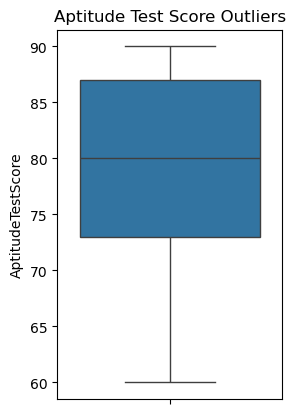

In [47]:
# Aptitude Test Score
plt.subplot(1, 2, 1)
sns.boxplot(y=df['AptitudeTestScore'])
plt.title("Aptitude Test Score Outliers")

here we see that the line is right in the middle of the box, which meand that we have no ouliers here 

Text(0.5, 1.0, 'SSC Marks Outliers')

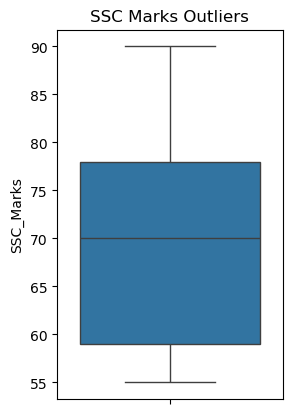

In [48]:
# SSC Marks
plt.subplot(1, 2, 2)
sns.boxplot(y=df['SSC_Marks'])  
plt.title("SSC Marks Outliers")

Text(0.5, 1.0, 'HSC Marks Outliers')

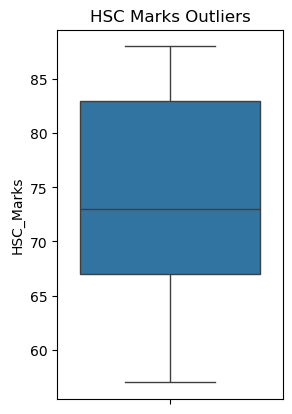

In [50]:
# HSC Marks
plt.subplot(1, 2, 2)
sns.boxplot(y=df['HSC_Marks']) 
plt.title("HSC Marks Outliers")

however, for SSC, HSC marks we notice that the box is skewed to one side, it means the data is not symmetrical (skewed distribution).

# Time to load the data
We need to define a name for the table that we are above to create in our database.

In [51]:
table_name = r'placementdata_cleaned'
schema = r'cleaned' # schema we created this week.

df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

10000